In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [5]:
df["y"].value_counts()

0    4000
1     521
Name: y, dtype: int64

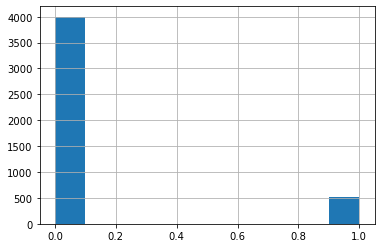

In [6]:
df["y"].hist()

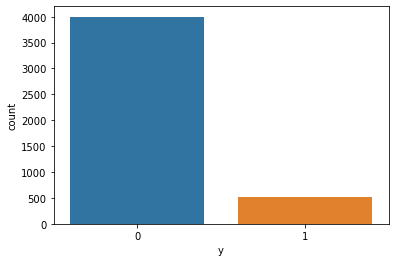

In [7]:
sns.countplot(df["y"])

## Кодирование с помощью словаря

In [6]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [7]:
d = {"no": 0, "yes": 1}
df["default"] = df["default"].map(d)

In [8]:
df["default"].value_counts()

0    4445
1      76
Name: default, dtype: int64

## Кодирование с помощью LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df["housing"].unique(), df["loan"].unique()

(array(['no', 'yes'], dtype=object), array(['no', 'yes'], dtype=object))

In [11]:
le = LabelEncoder()

In [12]:
df["housing"] = le.fit_transform(df["housing"])
df["loan"] = le.fit_transform(df["loan"])

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int32 
 7   loan       4521 non-null   int32 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int32(2), int64(9), object(6)
memory usage: 565.2+ KB


## Кодирование с помощью One-Hot-Encoding

In [15]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [16]:
df_cat = pd.get_dummies(df.select_dtypes("object"))

In [17]:
df_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
df_all = pd.concat([df_cat, df.select_dtypes(["int64", "int32"])], axis = 1)

In [19]:
df_all

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,0,0,0,0,0,0,0,0,0,0,...,0,1787,0,0,19,79,1,-1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,4789,1,1,11,220,1,339,4,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1350,1,0,16,185,1,330,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1476,1,1,3,199,4,-1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,5,226,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,0,-333,1,0,30,329,5,-1,0,0
4517,0,0,0,0,0,0,1,0,0,0,...,1,-3313,1,1,9,153,1,-1,0,0
4518,0,0,0,0,0,0,0,0,0,1,...,0,295,0,0,19,151,11,-1,0,0
4519,0,1,0,0,0,0,0,0,0,0,...,0,1137,0,0,6,129,4,211,3,0


In [20]:
df_all.sample(121)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
3679,0,0,0,0,0,0,0,1,0,0,...,0,-230,1,1,16,715,1,-1,0,0
3200,0,0,0,0,0,0,0,0,1,0,...,0,3298,1,0,28,227,1,-1,0,0
3304,0,0,0,0,0,1,0,0,0,0,...,0,846,0,0,11,671,1,181,3,1
2627,0,0,0,0,0,0,0,0,0,1,...,0,181,1,1,28,265,2,-1,0,0
1225,0,1,0,0,0,0,0,0,0,0,...,0,160,1,0,7,136,1,359,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,28,161,1,98,2,1
4330,0,0,0,0,1,0,0,0,0,0,...,0,36,1,0,27,240,3,-1,0,0
2219,0,0,0,0,0,0,0,0,0,1,...,0,2776,1,0,27,701,1,-1,0,1
3450,0,1,0,0,0,0,0,0,0,0,...,0,389,1,0,16,127,2,-1,0,0


## Разбиение данных на обучающую и проверочную выборки

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_all.drop("y", axis = 1)
y = df_all["y"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1,
                                                   stratify = y)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_cls = RandomForestClassifier(n_estimators = 500, )

In [26]:
rf_cls.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [27]:
from sklearn.metrics import classification_report

In [28]:
y_pred = rf_cls.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1320
           1       0.62      0.28      0.39       172

    accuracy                           0.90      1492
   macro avg       0.77      0.63      0.66      1492
weighted avg       0.88      0.90      0.88      1492



In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {"n_estimators": np.arange(100,1000,100)}

In [32]:
rf_cls = RandomForestClassifier()

In [33]:
grid = GridSearchCV(rf_cls, params, cv = 5, n_jobs = -1)

In [34]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [35]:
y_pred = grid.best_estimator_.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1320
           1       0.64      0.28      0.40       172

    accuracy                           0.90      1492
   macro avg       0.78      0.63      0.67      1492
weighted avg       0.88      0.90      0.88      1492



In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
rf_cls = RandomForestClassifier()

In [38]:
scores = cross_val_score(rf_cls, x_train, y_train, cv = 7)

In [40]:
scores.mean()

0.8976593716778474

# Визуализация качества работы модели

In [41]:
! pip install mlxtend

In [43]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [48]:
X_train_ml = x_train[["duration", "balance"]].values
y_train_ml = y_train.values

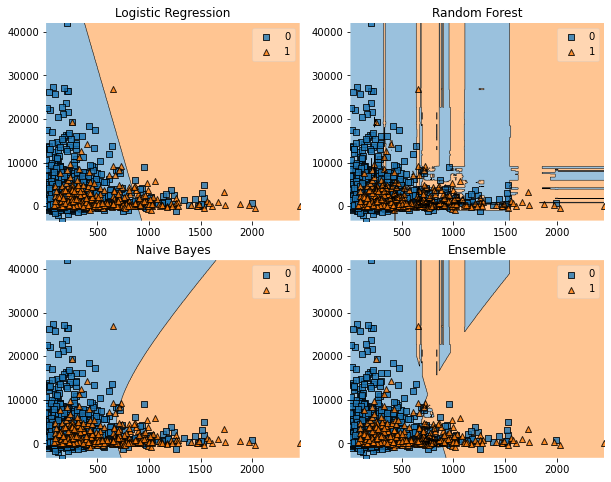

In [50]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(X_train_ml, y_train_ml)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_ml, y=y_train_ml, clf=clf)
    plt.title(lab)

# Imblearn

In [ ]:
! pip install imblearn

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### UnderSampling

In [28]:
X_under, Y_under = RandomUnderSampler().fit_resample(X,y)

In [29]:
Y_under.value_counts()

1    521
0    521
Name: y, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X_under, Y_under, test_size = 0.33, 
                                                    random_state = 1)

In [33]:
rf_cls = RandomForestClassifier(n_estimators = 500)

rf_cls.fit(x_train, y_train)

y_pred = rf_cls.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       172
           1       0.83      0.78      0.81       172

    accuracy                           0.81       344
   macro avg       0.81      0.81      0.81       344
weighted avg       0.81      0.81      0.81       344



### OverSampling

In [34]:
X_over, Y_over = RandomOverSampler().fit_resample(X,y)

In [35]:
Y_over.value_counts()

1    4000
0    4000
Name: y, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_over, Y_over, test_size = 0.33, 
                                                    random_state = 1)

rf_cls = RandomForestClassifier(n_estimators = 500)

rf_cls.fit(x_train, y_train)

y_pred = rf_cls.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1336
           1       0.95      1.00      0.97      1304

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



In [37]:
pd.DataFrame(rf_cls.feature_importances_, index = df_all.drop("y", axis = 1).columns, 
            columns = ["Features"]).sort_values(by="Features", ascending = False)

,Features
duration,0.328915
balance,0.084461
age,0.074013
day,0.069953
campaign,0.036272
pdays,0.035180
poutcome_success,0.024445
previous,0.024109
contact_unknown,0.019060
housing,0.016893


## XGBoost - экстримальный градиентный бустинг

In [38]:
from xgboost import XGBClassifier, plot_importance, plot_tree

In [68]:
xgb_cls = XGBClassifier(n_estimators = 10000, learning_rate = 0.3, n_jobs = -1, random_state = 1)

In [69]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [70]:
y_pred = xgb_cls.predict(x_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1336
           1       0.93      1.00      0.96      1304

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



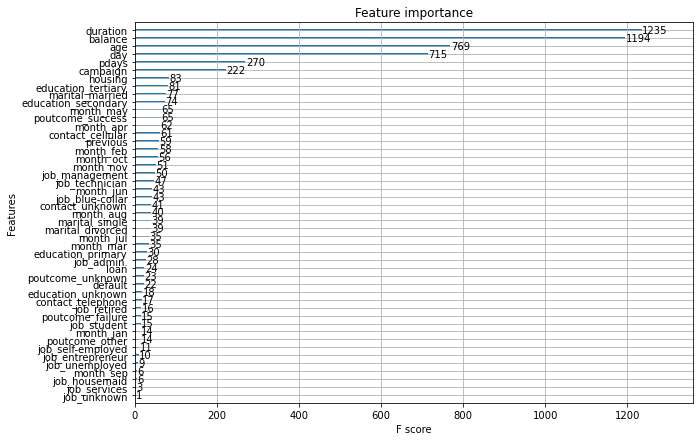

In [43]:
plt.rcParams["figure.figsize"] = (10,7)
plot_importance(xgb_cls)

In [146]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Users\AppData\Local\Continuum\anaconda3\Library\bin\graphviz'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-146-bc1712cf155f>, line 2)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

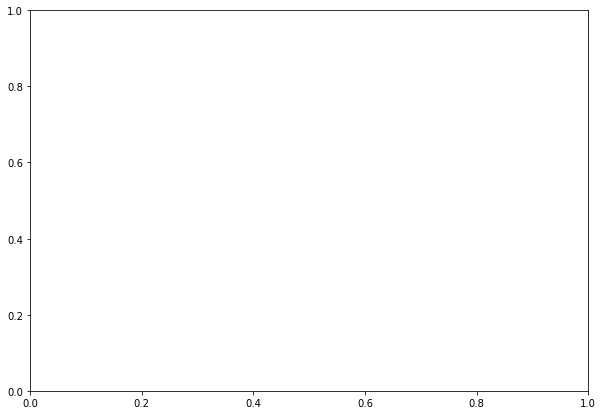

In [44]:
plot_tree(xgb_cls)

In [45]:
xgb_cls.feature_importances_

array([0.01078667, 0.01895307, 0.01937293, 0.02971254, 0.00723003,
       0.008466  , 0.01097191, 0.01065377, 0.04739711, 0.00774048,
       0.01863743, 0.02479052, 0.00830794, 0.00667709, 0.00838332,
       0.01388725, 0.00530536, 0.00779712, 0.00998359, 0.00922217,
       0.00982473, 0.09063194, 0.03096062, 0.01086266, 0.        ,
       0.0219224 , 0.02551425, 0.02901438, 0.02344631, 0.0443158 ,
       0.02449872, 0.01661719, 0.03551547, 0.00379476, 0.03139416,
       0.05121264, 0.08018515, 0.01127572, 0.00983186, 0.01600823,
       0.00923269, 0.01384699, 0.03478431, 0.01100124, 0.03328784,
       0.00980188, 0.02158846, 0.01535335], dtype=float32)

## LightGBM

In [46]:
! pip install lightgbm

In [48]:
from lightgbm import LGBMClassifier, plot_tree, plot_importance 

In [64]:
lgbm_cls = LGBMClassifier(n_estimators = 10000, learning_rate= 1, random_state=1)

In [65]:
lgbm_cls.fit(x_train, y_train)

LGBMClassifier(learning_rate=1, n_estimators=10000, random_state=1)

In [66]:
y_pred = lgbm_cls.predict(x_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1336
           1       0.94      1.00      0.97      1304

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



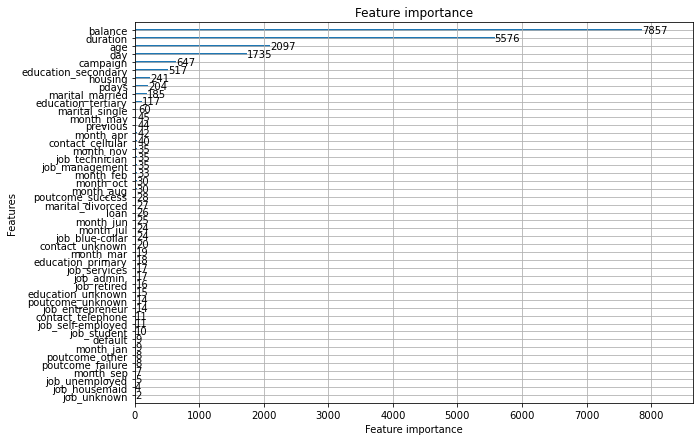

In [72]:
plot_importance(lgbm_cls)

## CatBoost

In [74]:
! pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=c2240ec603ca1535dabf461ca7f8837629733ac46c6f7319cb40252c6ede6c42
  Stored in directory: c:\users\dmitrii\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [75]:
from catboost import CatBoostClassifier

In [76]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [77]:
X_over, Y_over = RandomOverSampler().fit_resample(df.drop("y", axis = 1),df["y"])

In [79]:
x_train, x_test, y_rain, y_test = train_test_split(X_over, Y_over, test_size = 0.33, 
                                                   random_state = 1)

In [80]:
cat_features = list(df.select_dtypes("object").columns)

In [82]:
x_train[cat_features]

,job,marital,education,contact,month,poutcome
3729,entrepreneur,married,primary,cellular,aug,unknown
7202,admin.,single,secondary,cellular,aug,failure
7227,blue-collar,single,secondary,cellular,nov,unknown
2241,blue-collar,married,primary,unknown,jun,unknown
701,technician,single,tertiary,cellular,jul,unknown
...,...,...,...,...,...,...
7935,management,married,secondary,cellular,jul,failure
5192,retired,married,secondary,telephone,jul,unknown
3980,blue-collar,married,secondary,unknown,jun,unknown
235,technician,divorced,secondary,cellular,aug,unknown


In [92]:
cb_cls = CatBoostClassifier(cat_features=cat_features, n_estimators=500, learning_rate = 1)

In [94]:
cb_cls.fit(x_train, y_train, plot = True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [95]:
y_pred = cb_cls.predict(x_test)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1336
           1       0.92      0.99      0.95      1304

    accuracy                           0.95      2640
   macro avg       0.96      0.95      0.95      2640
weighted avg       0.96      0.95      0.95      2640

